<h1>MNIST</h1>

<p>In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Burea. Each image is labeled with the digit it represents. </p>

<p>Scikit-learn provides many helper functions to download popular datasets. MNIST is one of them. </p>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version = 1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
mnist["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

<p>There are 70,000 images and each image has 784 features. This is because each image is $28 \times 28$ pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black). </p> 

<p>We'll look at a digit from the dataset. </p>

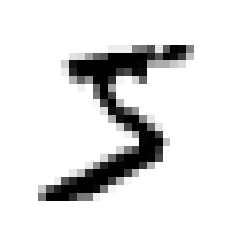

In [7]:
import matplotlib.pyplot as plt

some_digit = X.loc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [8]:
y[0]

'5'

In [9]:
import numpy as np

y = y.astype(np.uint8)

<p>Let's create a test set and set it aside before inspecting the data closely. </p>

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<h2>Training a Binary Classifier</h2>

<p>Binary classification is the task of classifying the elements of a set into two groups on the basis of a classification rule. </p>

<p>In this example, we'll classify based on whether or not a digit is 5. </p>

<p>We will start off by looking at a Stochastic Gradient Descent (SGD) classifier. </p>

<p>This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time. </p>

In [12]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

<p>The classifier guesses the image represents a 5, which we know to be True. </p>

<h2>Performance Measures</h2>

<p>Now, let's look at the model's performance. </p>

<p>Evaluating a classifier is often trickier than evaluating a regressor. </p>

<h3>Cross-validation</h3>

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_5.loc[train_index]
    X_test_fold = X_train.loc[test_index]
    y_test_fold = y_train_5.loc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


<p>The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then, it counts the number of correct predictions and outputs the ratio of correct predictions. </p>

<p>Next, we will use the cross_val_score() function to evaluate our SGDClassifier model, using K-fold cross-validation with three folds. K-fold cross-validation means splitting the training set into K folds, then making predictions and evlauting them on each fold using a model trained on the remaining folds. </p>

In [16]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

<p>It looks like we have above 95% accuracy on all cross-validation folds. Before we get ahead of ourselves, let's look at a classifier which classifies every image in the "not-5" class. </p>

In [17]:
from sklearn.base import BaseEstimator 

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

<p>This seems to have over a 90% accuracy. This is because only about 10% of the images are 5s, so if you always guess an image is not a 5, you'll be right roughly 90% of the time. </p> 

<p>This demonstrates why accuracy is not the preferred measure for classifiers, especially when dealing with skewed datasets. </p>

<h3>Confusion Matrix</h3>

<p>A much better way to evaluate the performance of a classifier is to look at the confusion matrix. </p>

<p>The general idea is to count the number of times instances of class A are classified as class B. </p>

<p>To compute the confusion matrix, you first need to have a set of predictions so thata they can be compared to the actual targets. </p>

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

<p>The cross_val_predict function performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means you get a clean prediction for each instance in the training set. </p>

In [22]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

<p>Each row represents an actual class, while each column represents a predicted class. </p>

<p>Here, the first row considers non-5 images (negative class), where 53,892 of them were correctly classified as non-5s (true negatives), while the remaining 687 were wrong classified as 5s (false positives). </p>

<p>The second row considers the images of 5s (positive class), where 1325 were wrongly classified as non-5s (false negatives), while the remaining 3530 were correctly classified (true positives). </p>

<p>A perfect classifier would have only true positives and true negatives. </p>

In [24]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

<h4>Precision</h4>

<p>The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions, referred to as the precision of the classifier. </p>

$\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$

<h4>Recall</h4>
<p>Precision is typically used along with another metric called recall, also called sensitivity or the true positive rate. This is the ratio of positive instances that are correctly detected by the classifier.</p>

$\text{recall} = \frac{\text{TP}}{\text{TP}+ \text{FN}}$

<h4>Precision and Recall </h4>

In [25]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

<p>Now, our 5-detector doesn't look as effective. </p>

<h4>$\text{F}_{1}$ Score </h4>

<p>It is often convenient to combine precision and recall into a single metric called the $\text{F}_{1}$ score. This is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. </p>

<p>As a result, the classifier will only get a high $\text{F}_{1}$ score if both recall and precision are high.</p>

$\text{F}_{1} = \frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}= \frac{\text{TP}}{\text{TP} + \frac{\text{FN}+\text{FP}}{2}}$

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

<h4>Precision/Recall Trade-Off</h4>

<p>The $\text{F}_{1}$ score favors classifiers that have similar precision and recall. This is not always what you want. In some contexts you mostly care about precision, in others contexts you care about recall. </p>

<p>Unfortunately, you can't have it both ways. Increasing precision reduces recall, and vice-versa. This is known as the precision/recall trade-off. </p>

<p>To understand this trade-off, we will look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function. If that score is greater than a threshold, then it assigns the instance to the positive class; otherwise, it assigns it to the negative class. </p>

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [31]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

<p>The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict method. Let's look at raising the threshold.</p>

In [32]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

<p>Here, we see that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses when the threshold is increased to 8000. </p>

<p>We therefore must question: How do we decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions. </p>

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

<p>With these scores, we use the precision_recall_curve() function to compute the precision and recall for all possible thresholds. </p>

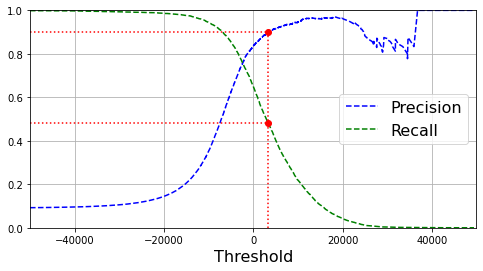

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.legend(loc = "center right", fontsize = 16)
    plt.xlabel("Threshold", fontsize = 16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.savefig("precision_recall_vs_threshold_plot")                                              
plt.show()

<p>Here, the precision curve is bumpier than the recall curve, as precision may sometimes go down when you raise the threshold. On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth. </p>

<p>Another way to select a good precision/recall trade-off is to plot precision directly against recall. </p>

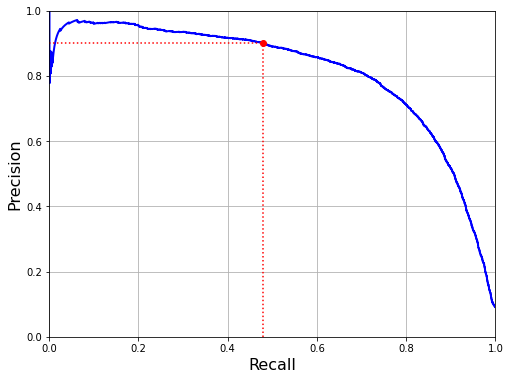

In [39]:

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.savefig("precision_vs_recall_plot")
plt.show()

<p>Here, the precision starts to fall sharply around 80% recall, meaning we would probably want to select a precision/recall trade-off just before that drop. </p>

<p>Suppose for example we want 90% precision. If we look at the first plot, we find that we need to use a threshold of about 8000. To be more precise, we can search for a threshold that gives 90% precision. </p>

In [44]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

y_train_pred_90 = (y_scores >= threshold_90_precision)

In [45]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [46]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

<p>Here, we have found a 90% precision classifier. However, as we can see the recall is very low, which isn't much use. </p>